In [1]:
%pylab inline
from sklearn import discriminant_analysis
from matplotlib import colors
from sklearn import linear_model
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Parameters for generated data.
blue_mean = [1, 0]
orange_mean = [0, 1]
cov_matrix = [[1, 0], [0, 1]]

In [3]:
# Generates training set.
training_blue_x, training_blue_y = random.multivariate_normal(blue_mean, cov_matrix, 100).T
training_blue_points = column_stack((training_blue_x, training_blue_y))

training_orange_x, training_orange_y = random.multivariate_normal(orange_mean, cov_matrix, 100).T
training_orange_points = column_stack((training_orange_x, training_orange_y))

training_points = concatenate((training_blue_points, training_orange_points))

# Generates test set.
test_blue_x, test_blue_y = random.multivariate_normal(blue_mean, cov_matrix, 5000).T
test_blue_points = column_stack((test_blue_x, test_blue_y))
                                
test_orange_x, test_orange_y = random.multivariate_normal(orange_mean, cov_matrix, 5000).T
test_orange_points = column_stack((test_orange_x, test_orange_y)) 
                                  
test_points = concatenate((test_blue_points, test_orange_points))

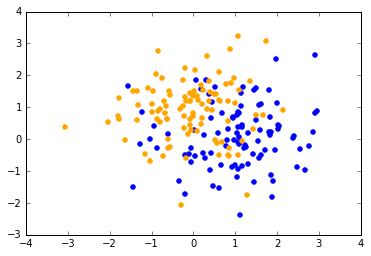

In [4]:
# Plots training set.
scatter(training_blue_x, training_blue_y, color='blue')
scatter(training_orange_x, training_orange_y, color='orange')

In [5]:
# Generates output labels.
training_labels = concatenate(
    (['blue' for x in range(len(training_blue_x))], ['orange' for x in range(len(training_orange_x))]))
training_num_labels = concatenate(
    ([0 for x in range(len(training_blue_x))], [1 for x in range(len(training_orange_x))]))

test_labels = concatenate(
    (['blue' for x in range(len(test_blue_x))], ['orange' for x in range(len(test_orange_x))]))
test_num_labels = concatenate(
    ([0 for x in range(len(test_blue_x))], [1 for x in range(len(test_orange_x))]))

In [6]:
# Uses a LinearDiscriminantAnalysis model.
lda = discriminant_analysis.LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda_model = lda.fit(training_points, training_labels.ravel())

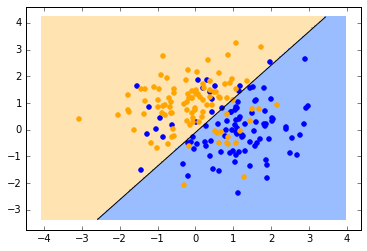

In [8]:
# Plots results of the LinearDiscriminantAnalysis model.

# Plots color regions for the predictions.
cmap_light = ListedColormap(['#99bdff', '#ffe4b2'])
nx, ny = 200, 100
x_min, x_max = training_points[:, 0].min() - 1, training_points[:, 0].max() + 1
y_min, y_max = training_points[:, 1].min() - 1, training_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = lda_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plots training set.
scatter(training_blue_x, training_blue_y, color='blue')
scatter(training_orange_x, training_orange_y, color='orange')

In [10]:
# Uses a LinearRegression model.
lr = linear_model.LinearRegression()
lr_model = lr.fit(training_points, training_num_labels)

In [12]:
# Extracts coefficients of the lineal model.
x_lr_coef = lr_model.coef_[0]
y_lr_coef = lr_model.coef_[0]
free_lr_coef = lr_model.intercept_

In [13]:
# Calculates slope and intercept of border.
lr_slope = x_lr_coef/y_lr_coef; #por qué no es negativa!?
lr_intercept = (0.5 - free_lr_coef)/y_lr_coef

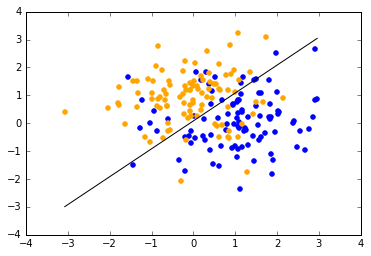

In [14]:
# Plots results of the LinearRegression model.
scatter(training_blue_x, training_blue_y, color='blue')
scatter(training_orange_x, training_orange_y, color='orange')
sorted_training_x = sorted(concatenate((training_blue_x, training_orange_x)))
plot(sorted_training_x, [lr_slope*x + lr_intercept for x in sorted_training_x], color='k', marker='')

In [20]:
# Calculates error for the LinearRegression model.

#For the training set.
pred_labels = lr_model.predict(training_blue_points)
wrong_blue = sum([x >= 0.5 for x in pred_labels]) # I'm counting the blue dots that are predicted as orange.

pred_labels = lr_model.predict(training_orange_points)
wrong_orange = sum([x < 0.5 for x in pred_labels])

training_error = (wrong_blue+wrong_orange)/(len(training_blue_points)+len(training_orange_points))
print('Training Error: {0:.2f}%'.format(training_error*100))

#For the test set.
pred_labels = lr_model.predict(test_blue_points)
wrong_blue = sum([x >= 0.5for x in pred_labels]) 

pred_labels = lr_model.predict(test_orange_points)
wrong_orange = sum([x < 0.5 for x in pred_labels])

test_error = (wrong_blue+wrong_orange)/(len(test_blue_points)+len(test_orange_points))
print('Test Error: {0:.2f}%'.format(test_error*100))

Training Error: 19.00%
Test Error: 24.75%
